In [1]:
pwd

'/Users/alex/Galvanize/Work_Done/projects/Capstone_Projects/International-Maritime-Piracy/notebook'

### Start by bringing in the same stuff as before

In [35]:
# base imports
import sys
import numpy as np
import pandas as pd

# matplotlib (... yea, my favorite)
import matplotlib.pyplot as plt
from matplotlib import colors

# NLTK for lemmaizing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn - term vectorizing
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# k-means
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# word2vec
from gensim.models import Word2Vec



In [3]:
path = '../data/data_pipe.csv'
data = pd.read_csv(path, sep='|', encoding='utf-8')

In [4]:
pd.options.display.max_colwidth = 110
data['description'][2:6]

2    On September 23rd a duty watchman on board a tanker anchored near position 06-17N 003-14E saw two robbers ...
3    TWO FISHING BOATS SAILED TOWARDS TAMBISAN FOR FISHING /SHRIMP ACTIVITIES. SEVEN ARMED PERSONS IN TWO PUMP ...
4    On September 16th four robbers armed with a gun and knives boarded an anchored tanker near position 09-25N...
5    INDONESIA: On 21 July, seven pirates armed with a pistol and knives in a small speed boat boarded the Sout...
Name: description, dtype: object

### Let's start with getting the common terms. But (and this is a note from the future) we're going to want to add a bunch of numbers to the stopwords

In [5]:
bs_numbers = ['00', '000', '0000', '0001', '0001z', '0002', '0004', '0005',
       '0006', '0008', '000dwt', '000s', '000usd', '001', '0010', '0011',
       '0013', '0014', '0015', '0017', '0018', '0019', '002', '0020',
       '0020z', '0021', '0022', '0023', '0025', '0026', '0028', '003',
       '0030', '0033', '0035', '0036', '004', '0040', '0042', '0043',
       '0044', '0045', '0048', '005', '0050', '0050z', '0052', '0054',
       '0054z', '0055', '0055z', '0057', '0057n', '0058', '006', '0069',
       '007', '008', '0081', '009', '00e', '00m', '00n', '00s', '00w',
       '01', '010', '0100', '0100z', '0102', '0104', '0105', '0106z',
       '0107', '0108', '011', '0110', '0110lt', '0110z', '0112z', '0114z',
       '0115', '0115z', '0118', '0119', '011918z', '012', '0120', '0121',
       '012230', '0125', '0127', '0128', '013', '0130', '0131z', '0132',
       '01326e', '0135', '0137', '013n', '014', '0140', '0140local',
       '0140z', '0142', '0144', '0145', '015', '0150', '0152', '0153',
       '0155', '016', '017', '018', '019', '01e', '01n', '01nm', '01s',
       '01w', '02', '0200', '0200hrs', '0200z', '0204', '0205', '0205z',
       '0206', '0206z', '0210', '0210z', '0212', '0214', '0215', '0216',
       '0218z', '0220', '0221', '0223', '0224', '0225', '0226z', '0229',
       '023', '0230', '0230z', '0231', '0232z', '0234', '0234z', '0235',
       '0236', '0237', '023w', '0240', '0240z', '0242', '0243', '0245',
       '0245lt', '0245z', '0247', '0248', '0249z', '025', '0250', '0252',
       '0252s', '0252z', '0254', '0254z', '0255', '0256', '0258', '026',
       '027', '028', '029', '02e', '02may91', '02n', '02s', '02w', '03',
       '030', '0300', '0300lt', '0300s', '0300z', '0303', '030410z',
       '0305', '0306', '030700z', '0308', '031', '0310', '0312', '0312z',
       '0313', '0314', '0315', '0315z', '031615', '0317', '031830z',
       '032', '0320', '0322', '032215zjun91', '0324', '0325', '0326',
       '0327', '0328', '033', '0330', '0330utc', '0330z', '0332', '0333',
       '0335', '0338', '034', '0340', '0340z', '0341', '0342', '0342z',
       '0343', '0344', '0345', '0345z', '0347', '0348', '035', '0350',
       '0350z', '0352', '0353', '0354z', '0355', '0357', '0358', '0359',
       '036', '038', '039', '03e', '03jul91', '03n', '03s', '03w', '04',
       '040', '0400', '040124', '040230aug91', '0403', '0403z', '0405',
       '0405z', '0408z', '0409', '041', '0410', '0410z', '0412', '0413',
       '041406', '0415', '0417', '0418', '0419', '042', '0420', '0420z',
       '0421z', '0424', '0425', '0426', '0427', '0428', '043', '0430',
       '0430lt', '0430z', '0435', '0436', '0438', '044', '0440', '0442',
       '04420', '0443', '0444z', '0445', '0445z', '0446', '0447', '0447z',
       '0448', '045', '0450', '0450lt', '0450z', '0451', '0452', '0453',
       '0454', '0455', '0455z', '046', '047', '048', '04825', '049',
       '04907', '04e', '04may91', '04n', '04s', '04w', '05', '050',
       '0500', '0500z', '0501', '0502', '0503', '050332', '0504',
       '050400fmay92', '050430z', '0505', '0505z', '0506', '050912',
       '051', '0510', '0510z', '0511', '0512', '0512z', '0513', '0515',
       '051537z', '0516z', '0519', '052', '0520', '0520z', '052145zjan92',
       '0522', '0523', '05236e', '0524', '0525', '0525z', '0528z', '053',
       '0530', '0530utc', '0530z', '0531', '0532', '0532z', '0534',
       '0534z', '0535', '0535z', '0536', '0538', '0539', '054', '0540',
       '0540z', '0545', '0545z', '055', '0550', '0550local', '0550utc',
       '0552', '0555', '0555z', '0556', '0556z', '056', '057', '05720e',
       '058', '059', '059e', '05e', '05n', '05nov91', '05s', '05w', '06',
       '060', '0600', '0600z', '0601', '0603', '0605', '0606', '060630',
       '060711', '060757', '060855', '061', '0610', '061015z', '06118e',
       '0612', '061245z', '061245zaug91', '0613', '0615', '0615z', '0618',
       '062', '0620', '0620z', '0622', '062200z', '0623z', '0625',
       '0627z', '0628', '0629', '063', '0630', '0630z', '0631z', '0635',
       '0635z', '0639', '064', '0640', '0640z', '0641', '0642z', '0645',
       '0646', '0646z', '0648', '0649', '064n', '065', '0650', '0650z',
       '0651z', '0652', '0652z', '0653', '0655', '0655z', '0656z', '0657',
       '0658', '0658z', '066', '067', '068', '069', '06apr91', '06e',
       '06n', '06s', '06w', '07', '070', '0700', '0700z', '0701z', '0702',
       '070350', '0704', '0705', '0705z', '0707', '0707z', '071', '0710',
       '071220apr91', '0713z', '0714z', '0715', '0716z', '0717', '072',
       '0720', '0720z', '0721z', '0722', '0725', '0727z', '0728', '0729',
       '0730', '0730z', '0733', '0734', '0735', '0737', '074', '0740',
       '0741', '0742', '0744', '0745', '0747', '0748', '0748z', '0749',
       '075', '0750', '0752', '0753', '0755', '076', '077', '078', '079',
       '07e', '07jun91', '07n', '07s', '07w', '08', '080', '0800',
       '0800z', '0803', '0804', '080430z', '0805', '080704', '0808',
       '081', '0810', '0810z', '0812z', '0813', '0814z', '0815', '081645',
       '081720', '081s', '082', '0820', '0820z', '082100z', '0822z',
       '0823', '0824', '0824z', '0825', '0829', '083', '0830', '0830z',
       '0831', '0834', '0835', '0836', '084', '0840', '0842', '0845',
       '0845z', '0846z', '0848', '085', '0850', '0850z', '0855', '0855z',
       '086', '087', '088', '089', '08e', '08n', '08s', '08w', '09',
       '090', '0900', '0900lt', '0900utc', '0900z', '0901',
       '090100lmay92', '0901z', '0904', '0904z', '0905', '0906', '0907',
       '090700fmay92', '0907z', '0908', '090834z', '0908z', '0909',
       '090950', '091', '0910', '091016', '0912', '0914', '0915', '0917z',
       '0918', '091820z', '092', '0920', '0920z', '0921z', '0922',
       '0923z', '0924', '0925', '0925z', '0926', '0928z', '093', '0930',
       '0930l', '0930z', '0934z', '0935', '0936', '094', '0940', '0942',
       '0943z', '0944', '0945', '0945z', '0948', '0949z', '095', '0950',
       '0950z', '0951', '0952', '0952z', '0953', '0955lt', '096', '097',
       '098', '099', '09e', '09n', '09oo', '09s', '09w', '0e', '0n', '0s',
       '0w', '10', '100', '1000', '1001', '1002', '1005', '100558z',
       '1005z', '100600z', '1008', '100930', '100km', '100m', '100nm',
       '100s', '101', '1010', '101115z', '1011z', '1012', '101212z',
       '10127e', '1013', '101338z', '1015', '101504z', '1016', '101911z',
       '102', '1020', '1021', '10211e', '1022z', '1023', '1024z', '1025',
       '1025z', '1026', '1029z', '103', '1030', '1031', '1035', '1035z',
       '1039', '1039z', '104', '1040', '1040z', '1043n', '1045', '1045z',
       '1046', '1047', '104e', '104nm', '105', '1050', '1050z', '1052',
       '1052z', '1053', '1055', '1059z', '105nm', '106', '10651e', '107',
       '1070nm', '10715e', '10718', '107nm', '108', '1085', '109', '10e',
       '10feb92', '10kts', '10m', '10may91', '10n', '10nm', '10s', '10th',
       '10w', '11', '110', '1100', '1100utc', '1100z', '110200l', '1104',
       '1105', '110542z', '1106', '1107', '110737', '110830zsep92',
       '110nm', '111', '1110', '111030z', '1112', '111212', '1113',
       '1114', '1115', '1115nm', '111605zsep91', '111700z', '1118z',
       '112', '1120', '1120z', '112315lsep91', '1125', '1126', '1126z',
       '1127', '1128', '1129', '113', '1130', '1130z', '1132', '1132z',
       '1135', '1137', '114', '1140', '1141', '1142z', '1145', '114nm',
       '114rpm', '115', '1150', '1150nm', '1151', '1152z', '1154', '1155',
       '1158', '1159', '115nm', '116', '117', '118', '118nm', '119',
       '11aug', '11e', '11jun', '11may91', '11n', '11nm', '11s', '11th',
       '11w', '12', '120', '1200', '12004', '1200n', '1200z', '120355z',
       '1204', '1205', '1206', '1206z', '1208', '120nm', '121', '1210',
       '1211', '1212', '1213', '1215', '121651z', '1218', '1219', '1219z',
       '122', '1220', '122015z', '1220z', '1224', '1225', '123', '1230',
       '1230lt', '1230z', '1233z', '1234', '1235', '1236', '1236z',
       '1237z', '1238', '123nm', '124', '1240', '1241', '1243', '1245',
       '1245z', '125', '1250', '1250z', '1251', '1252', '1254', '1254z',
       '1255', '1255z', '1258', '125nm', '126', '127', '128', '129',
       '12e', '12feb91', '12knots', '12knts', '12kts', '12m', '12n',
       '12nm', '12s', '12w', '12x4', '13', '130', '1300', '1300hp',
       '1300z', '130200', '1303', '1304', '1304z', '1305', '1305z',
       '130616z', '1307', '130708z', '130938z', '130nm', '131', '1310',
       '131000z', '1315', '1316', '1316z', '1317', '1317z', '1318',
       '131nm', '132', '1320', '1322', '1323', '1325', '1327', '133',
       '1330', '1330z', '1334', '1335', '1336', '1338', '1339', '133nm',
       '134', '1340', '1340z', '1342', '1342z', '1343', '1345', '1347',
       '1349', '134nm', '135', '1350', '1350z', '1354', '1355', '1357',
       '135nm', '136', '137', '137nm', '138', '13e', '13n', '13nm', '13s',
       '13w', '14', '140', '1400', '1400z', '1405', '140505', '1405z',
       '1406', '140756z', '140nm', '141', '1410', '141000', '1411',
       '1411z', '1412', '1415', '1415z', '1416z', '1418', '141nm', '142',
       '1420', '142130z', '1421n', '1423', '1425', '143', '1430', '1430z',
       '1431', '1431z', '1432z', '1435', '1436', '1437', '1438z', '1439z',
       '144', '1440', '1440z', '1443', '1445', '1449', '145', '1450',
       '1451', '1453', '1453z', '1454', '1457', '1458', '145nm', '146',
       '147nm', '148', '148nm', '149', '14e', '14n', '14nm', '14s', '14w',
       '15', '150', '1500', '15000', '1500z', '1502', '1503', '1503z',
       '1505', '1506z', '1507', '1508', '150nm', '1510', '15102008',
       '1510z', '1512', '1513', '1514', '1515', '152', '1520', '1520z',
       '152200apr91', '1525', '1525z', '1528', '153', '1530', '1530z',
       '1532', '1535', '1536', '1536z', '1538', '1539z', '153nm', '154',
       '1540', '1541', '1543', '1545', '1545z', '1546', '1548n', '155',
       '1550', '1550z', '1552z', '1555', '155nm', '157', '159', '15aug97',
       '15e', '15hp', '15knts', '15kts', '15m', '15mins', '15n', '15nm',
       '15s', '15w', '16', '160', '1600', '1605', '160nm', '161', '1610',
       '1610z', '1612', '1615', '1616', '1618', '162', '1620', '1620z',
       '1622', '1625', '1628', '1629', '1630', '1630z', '1636', '1639',
       '164', '1640', '1645', '1649', '165', '1650', '1652', '165nm',
       '167', '168', '169', '16aug97', '16e', '16knts', '16kts', '16mm',
       '16n', '16nm', '16s', '16th', '16w', '17', '170', '1700', '1700z',
       '1704', '1705', '1706z', '1708', '170952z', '170nm', '171', '1710',
       '1712', '1713', '1715', '1718', '171937z', '172', '1720',
       '172030z', '1720z', '1722', '1725', '1726', '173', '1730', '1730z',
       '1732', '1735', '1736', '1739', '174', '1740', '1740z', '1742z',
       '1745', '1749z', '1750', '1750z', '1751', '1751z', '1755', '1759',
       '175nm', '177', '179nm', '17e', '17kts', '17n', '17nm', '17s',
       '17w', '18', '180', '1800', '180230zaug92', '1804', '1805',
       '1806z', '1808', '180920z', '180953z', '180nm', '1810', '1810z',
       '1812', '181343', '1815', '1815z', '181700z', '181830z', '1819',
       '181915', '181945z', '182', '1820', '1820z', '182100z', '1825',
       '1828', '183', '1830', '1830z', '1833', '1835', '184', '1841',
       '1842', '1845', '1846', '1848', '185', '1850', '1850z', '1851',
       '1852', '1853', '1855', '185nm', '188', '18e', '18knts', '18kts',
       '18n', '18nm', '18oct91', '18s', '18w', '19', '190', '1900',
       '190230g', '1904z', '1905', '1905z', '1906', '190847', '190nm',
       '1910', '1910z', '1912', '1915', '191600z', '1918', '192', '1920',
       '1920z', '1924z', '1925', '1926', '1927', '1929', '1930', '1932',
       '1934', '1934z', '1935', '1936', '1936z', '1940', '1940z', '1942',
       '1945', '1947z', '1950', '1953', '1955', '1956', '1977', '1978',
       '197nm', '198', '1984', '1985', '1986', '1987', '1988', '1989',
       '199', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '19e', '19kts', '19n', '19nm', '19s',
       '19th', '19w', '1a', '1e', '1km', '1n', '1nm', '1s', '1st', '1w',
       '20', '200', '2000', '20000033', '2000lt', '2001', '2002',
       '20020011', '20020344', '2003', '200351z', '2004', '2005', '2006',
       '2007', '20070107', '2008', '200857z', '2009', '200hp', '200nm',
       '201', '2010', '2010z', '2011', '2012', '201200', '2013', '2015',
       '2016', '2017', '201744z', '2018', '202', '2020', '2021',
       '202303z', '2025', '2026', '2029z', '2030', '2030lt', '2034z',
       '2035', '2037', '2038n', '2040', '2040z', '2045', '2047', '2048',
       '2049', '205', '2050', '2050z', '2052', '2054', '2055', '2057',
       '205nm', '20aug97', '20e', '20kts', '20m', '20n', '20nm', '20s',
       '20w', '21', '210', '2100', '2101', '210145l', '2102z', '2105',
       '2106', '210757', '210911z', '210nm', '2110', '2112', '2114z',
       '2115', '211544z', '2115lt', '2115z', '2116', '2117', '2118',
       '2119', '212', '2120', '2122', '2123', '212341z', '2125', '212nm',
       '213', '2130', '2134', '2135', '2135z', '2138', '2139', '213nm',
       '214', '2140', '2140z', '2145', '2148', '215', '2150', '2155',
       '2155z', '2156', '2156z', '215nm', '216', '218', '2182', '21at',
       '21d', '21dec', '21e', '21n', '21nm', '21nov92', '21s', '21st',
       '21w', '22', '220', '2200', '2200z', '2201', '2202', '2203',
       '220312z', '220428z', '2205', '220545z', '220nm', '221', '2210',
       '2215', '2217', '2218', '221900', '221nm', '2220', '2220lt',
       '2222', '222326z', '2225', '2227', '2230', '2230z', '2234', '2235',
       '2238', '224', '2240', '2240z', '2241', '2242', '2243', '2245',
       '2248', '225', '2250', '2255', '2256', '2258', '225nm', '226',
       '227', '228', '22apr92', '22e', '22knts', '22kts', '22n', '22nd',
       '22nm', '22s', '22w', '23', '230', '2300', '2300z', '2301',
       '230105z', '2302', '230233z', '2303', '2303z', '2305', '2306',
       '2308', '230840', '230nm', '2310', '2312', '231311z', '2314',
       '2315', '232', '2320', '232030z', '2320z', '232300', '2325',
       '2328', '2329', '233', '2330', '2335', '2336', '2337', '2338',
       '2339', '234', '2340', '2342', '2343', '2345', '235', '2350',
       '2350local', '2353', '2354', '2355', '2356', '2359', '235nm',
       '236nm', '237', '237nm', '238', '2385769', '239', '23e', '23n',
       '23nm', '23rd', '23s', '23w', '24', '240', '2400', '2402',
       '240245lsep91', '240350z', '240nm', '241131', '241146', '241240z',
       '241245', '241949', '242200lapr92', '242245z', '245', '245nm',
       '246', '247', '248', '24e', '24ft', '24knts', '24n', '24nm', '24s',
       '24th', '24w', '25', '250', '250348', '250nm', '251', '251340',
       '251930', '2528n', '253', '255nm', '257', '259', '25e', '25ft',
       '25hp', '25k', '25knts', '25kts', '25m', '25n', '25nm', '25s',
       '25th', '25w', '26', '260', '260nm', '261515z', '262nm', '263nm',
       '265', '265nm', '266', '267', '268', '268nm', '26e', '26mar12',
       '26n', '26nm', '26s', '26th', '26w', '27', '270', '270015z',
       '270957utc', '270nm', '271004', '271021', '271740z', '272', '273',
       '274', '274nm', '275', '275nm', '277', '277nm', '27crew', '27e',
       '27jun', '27kts', '27mar91', '27n', '27nm', '27s', '27w', '28',
       '280', '280005', '280730z', '280830', '280917utc', '280nm',
       '281156z', '282011z', '282036', '2821', '2825', '282nm', '284',
       '285', '285e', '288', '289', '28e', '28feet', '28n', '28nm',
       '28nov92', '28s', '28w', '29', '290', '290915', '290nm', '291',
       '291023', '2912', '2925', '295', '296', '298', '298nm', '299',
       '29a', '29e', '29n', '29s', '29w', '2e', '2kts', '2m', '2n', '2nd',
       '2nm', '2s', '2w', '30', '300', '3000', '300203z', '300517z',
       '300nm', '301', '302', '302100z', '302146', '303', '304', '305',
       '308', '308nm', '30e', '30gmt', '30jul91', '30jun', '30km',
       '30knts', '30m', '30minutes', '30mm', '30n', '30nm', '30s', '30w',
       '31', '310', '310632z', '31102', '312', '312nm', '314', '315',
       '315nm', '315t', '31880', '319', '31e', '31january', '31n', '31nm',
       '31s', '31w', '32', '320', '320nm', '325', '325nm', '326', '328',
       '32e', '32n', '32nm', '32s', '32w', '33', '330', '3306', '330nm',
       '3312', '3316', '332', '333', '335', '336nm', '338', '33e', '33n',
       '33nm', '33s', '33w', '34', '340', '340nm', '342', '345', '348',
       '34e', '34m', '34n', '34nm', '34s', '34w', '35', '350', '3500',
       '350nm', '351', '35103', '351nm', '353', '356', '357nm', '358',
       '35e', '35km', '35n', '35nm', '35s', '35w', '36', '360', '360nm',
       '361', '363', '365', '366', '367', '36e', '36n', '36nm', '36s',
       '36w', '37', '370', '370nm', '37102', '3717', '375', '375nm',
       '378', '37e', '37n', '37nm', '37s', '37w', '38', '380', '380nm',
       '381', '381nm', '384ton', '385nm', '386', '38e', '38ft', '38n',
       '38nm', '38s', '38w', '39', '390', '391', '395nm', '398', '39e',
       '39n', '39nm', '39s', '39w', '3bsp', '3e', '3kts', '3n', '3nm',
       '3o', '3rd', '3s', '3w', '40', '400', '4000', '400m', '400nm',
       '402', '404', '405', '4059', '407', '408', '40e', '40miles', '40n',
       '40nm', '40s', '40w', '41', '410', '411nm', '412', '413nm', '415',
       '415nm', '41e', '41n', '41nm', '41s', '41w', '42', '420', '420nm',
       '421', '4237e', '425nm', '426nm', '427nm', '42e', '42n', '42nm',
       '42s', '42w', '43', '430', '430nm', '433nm', '435nm', '436', '437',
       '438nm', '43e', '43n', '43nm', '43s', '43w', '44', '440', '4404',
       '440nm', '444', '445', '446', '44e', '44n', '44nm', '44s', '44w',
       '45', '450', '4500', '450nm', '45101', '452', '455', '455nm',
       '45e', '45n', '45nm', '45s', '45w', '46', '460', '460nm', '46101',
       '46102', '465', '467', '46e', '46n', '46nm', '46s', '46w', '47',
       '470', '470nm', '471', '475', '475nm', '47e', '47n', '47s', '47w',
       '48', '480', '480nm', '483', '484nm', '486', '48e', '48n', '48nm',
       '48s', '48w', '49', '490', '493', '493nm', '495', '497', '49e',
       '49n', '49s', '49w', '4b', '4e', '4knts', '4m', '4n', '4n0', '4nm',
       '4s', '4th', '4w', '50', '500', '5000', '500m', '500mt', '500nm',
       '501', '503nm', '505', '507', '50am', '50e', '50m', '50meters',
       '50n', '50nm', '50s', '50w', '51', '512', '514', '515', '515nm',
       '517', '519', '51e', '51n', '51nm', '51s', '51w', '52', '520',
       '522', '525', '52e', '52n', '52nm', '52s', '52w', '53', '530',
       '530nm', '534', '535', '5350', '536', '538', '53e', '53n', '53nm',
       '53s', '53w', '54', '540', '540nm', '546', '549', '54e', '54n',
       '54s', '54w', '55', '550', '554', '558', '55e', '55n', '55nm',
       '55s', '55w', '56', '560', '560e', '560nm', '565', '565n', '565nm',
       '56e', '56n', '56nm', '56s', '56w', '57', '570', '572', '575',
       '576', '5769', '57e', '57n', '57nm', '57s', '57w', '58', '580nm',
       '581', '582', '585', '585nm', '588', '58e', '58n', '58nm', '58s',
       '58w', '59', '590nm', '591', '59e', '59n', '59nm', '59s', '59w',
       '5c', '5d', '5e', '5h', '5k', '5knts', '5kts', '5m', '5mil', '5n',
       '5nm', '5s', '5th', '5w', '60', '600', '600nm', '603', '609',
       '60ft', '60n', '60nm', '61', '616', '61e', '61n', '62', '620',
       '625', '628', '62e', '62n', '62nm', '62s', '63', '630nm', '634',
       '639', '63e', '63nm', '64', '640', '6400', '640nm', '649', '64e',
       '64n', '64nm', '64s', '65', '650', '650nm', '654', '658', '65e',
       '65n', '65nm', '66', '660', '660nm', '661', '663', '665nm', '666',
       '66e', '66nm', '67', '671', '672', '675nm', '67e', '67n', '67nm',
       '68', '680', '680nm', '683', '684nm', '689', '68e', '68m', '68n',
       '68nm', '68w', '69', '690', '690nm', '699', '69e', '6a', '6e',
       '6km', '6kts', '6m', '6n', '6nm', '6s', '6w', '70', '700', '7000',
       '700nm', '702', '704', '70e', '70ft', '70mm', '70n', '70nm', '70s',
       '71', '710', '711', '717', '72', '7205893', '720nm', '722', '724',
       '727', '729', '72e', '72n', '73', '73e', '73n', '73nm', '74',
       '740', '7400', '741', '743', '746', '7463', '748', '74n', '74nm',
       '75', '750', '750nm', '755', '756', '75e', '75hp', '75nm', '76',
       '760', '760nm', '762', '764', '769', '76e', '76n', '76s', '77',
       '770', '775', '77e', '78', '783', '7887', '78e', '78nm', '79',
       '790', '794', '798', '79e', '79n', '79nm', '7days', '7e', '7knts',
       '7kts', '7m', '7mm', '7n', '7nm', '7s', '7w', '80', '800', '805',
       '80e', '80n', '80nm', '81', '810', '812', '814', '815nm', '818',
       '819', '81e', '81n', '81nm', '82', '820', '823', '827', '829',
       '82e', '82nm', '82w', '83', '832', '833', '834', '837', '83e',
       '83nm', '84', '840nm', '846', '84e', '84n', '85', '850', '850nm',
       '852', '854', '8561', '85e', '85n', '85nm', '86', '863', '865',
       '865nm', '866', '86n', '86nm', '86s', '87', '8728', '877', '878',
       '87e', '87n', '87nm', '87s', '88', '880', '888', '889', '88e',
       '88m', '88nm', '89', '8e', '8kts', '8m', '8n', '8nm', '8s', '8w',
       '90', '900', '900nm', '902', '90352', '904', '90479', '908', '909',
       '90e', '90n', '90nm', '91', '911e', '912', '916', '917', '91nm',
       '91s', '92', '920', '921', '922', '925', '927', '92e', '92n',
       '92nm', '93', '930', '930nm', '935', '937', '93e', '93nm', '94',
       '943', '949', '94n', '95', '950', '950nm', '955', '957', '95821',
       '95e', '95n', '95nm', '95s', '96', '960', '964', '96507', '96640',
       '967', '96e', '96n', '97', '972', '974', '976', '977nm', '978',
       '97e', '97n', '97nm', '97s', '98', '980033', '980061', '980068',
       '9805', '981', '982', '985', '988', '98e', '98n', '98nm', '99',
       '990', '990031', '990032', '992', '997', '9e', '9m', '9mm', '9n',
       '9nm', '9s', '9w', 'a14']


In [6]:
redundant_terms =["ship", "vessel", "time"]

In [7]:
stop_words = text.ENGLISH_STOP_WORDS.union(bs_numbers)
type(stop_words)

frozenset

### Use a list comprehension get around the immutable aspect of a frozen set

In [8]:
stop_words = [i for i in stop_words]


In [9]:
stop_words = stop_words + bs_numbers + redundant_terms

In [10]:
#print(stop_words)

In [11]:
stop_words = set(stop_words)
data['description'] = [' '.join([term for term in x.lower().split() if term not in stop_words]) 
    for x in data['description'].tolist()]

### Check to make sure you got it right

In [12]:
pd.options.display.max_colwidth = 110
data['description'][2:6]

2    september duty watchman board tanker anchored near position 06-17n 003-14e saw robbers near forward cargo ...
3    fishing boats sailed tambisan fishing /shrimp activities. seven armed persons pump boats, wearing camoufla...
4    september robbers armed gun knives boarded anchored tanker near position 09-25n 013-44w. took hostage duty...
5    indonesia: july, seven pirates armed pistol knives small speed boat boarded south korea-flagged bulk carri...
Name: description, dtype: object

In [13]:
#vectorize = TfidfVectorizer.fit_transform(data, data['description'])

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(data['description'])

In [14]:
print(vectorizer.get_feature_names())

['aabltd', 'aaiun', 'aajum', 'ab', 'abachi', 'abadi', 'abandon', 'abandoned', 'abandoning', 'abbah', 'abbas', 'abd', 'abdi', 'abdomen', 'abduct', 'abducted', 'abducting', 'abduction', 'abductions', 'abductors', 'abdul', 'abdullah', 'abdullahi', 'abdullahpur', 'abdurahim', 'abeam', 'abiding', 'abidjan', 'abijan', 'ability', 'ablaze', 'able', 'abnormal', 'aboard', 'abort', 'aborted', 'aborting', 'abqaiq', 'abrasions', 'abrolhos', 'abs', 'absalon', 'absconding', 'absent', 'absolute', 'abu', 'abuja', 'abutting', 'ac', 'acceded', 'accelerated', 'accent', 'accents', 'accept', 'accepted', 'access', 'accessed', 'accesses', 'accessible', 'accessories', 'accident', 'accidental', 'accidentally', 'accommodate', 'accommodatioin', 'accommodation', 'accommodations', 'accommondation', 'accomodation', 'accomodations', 'accompanied', 'accompany', 'accompanying', 'accomplice', 'accomplices', 'accomplish', 'accomplished', 'according', 'accordingly', 'accosted', 'account', 'accounted', 'accounts', 'accra',

In [15]:
X.shape

(7843, 11647)

In [16]:
k_means = KMeans(n_clusters=50, random_state=23, verbose=1) 

In [17]:
X_transformed = k_means.fit_transform(X)

Initialization complete
Iteration  0, inertia 11796.914
Iteration  1, inertia 6715.085
Iteration  2, inertia 6616.429
Iteration  3, inertia 6584.719
Iteration  4, inertia 6567.804
Iteration  5, inertia 6556.997
Iteration  6, inertia 6552.340
Iteration  7, inertia 6550.296
Iteration  8, inertia 6548.997
Iteration  9, inertia 6547.928
Iteration 10, inertia 6546.924
Iteration 11, inertia 6545.951
Iteration 12, inertia 6544.937
Iteration 13, inertia 6544.224
Iteration 14, inertia 6543.911
Iteration 15, inertia 6543.565
Iteration 16, inertia 6543.323
Iteration 17, inertia 6542.976
Iteration 18, inertia 6542.733
Iteration 19, inertia 6542.517
Iteration 20, inertia 6542.217
Iteration 21, inertia 6541.861
Iteration 22, inertia 6541.562
Iteration 23, inertia 6541.381
Iteration 24, inertia 6541.224
Iteration 25, inertia 6541.054
Iteration 26, inertia 6540.945
Iteration 27, inertia 6540.884
Iteration 28, inertia 6540.857
Iteration 29, inertia 6540.837
Iteration 30, inertia 6540.823
Iteration 31, 

Iteration 10, inertia 6534.558
Iteration 11, inertia 6533.643
Iteration 12, inertia 6532.999
Iteration 13, inertia 6532.464
Iteration 14, inertia 6531.936
Iteration 15, inertia 6531.376
Iteration 16, inertia 6530.659
Iteration 17, inertia 6529.731
Iteration 18, inertia 6528.975
Iteration 19, inertia 6528.685
Iteration 20, inertia 6528.535
Iteration 21, inertia 6528.383
Iteration 22, inertia 6528.227
Iteration 23, inertia 6528.131
Iteration 24, inertia 6528.091
Iteration 25, inertia 6528.053
Iteration 26, inertia 6527.995
Iteration 27, inertia 6527.942
Iteration 28, inertia 6527.896
Iteration 29, inertia 6527.870
Iteration 30, inertia 6527.850
Converged at iteration 30: center shift 0.000000e+00 within tolerance 8.201795e-09
Initialization complete
Iteration  0, inertia 11846.646
Iteration  1, inertia 6730.777
Iteration  2, inertia 6606.931
Iteration  3, inertia 6573.253
Iteration  4, inertia 6559.858
Iteration  5, inertia 6552.005
Iteration  6, inertia 6547.701
Iteration  7, inertia 65

In [18]:
X_transformed

array([[1.00166955, 1.08514921, 1.00067649, ..., 1.01986288, 1.01527136,
        1.10332151],
       [1.0195323 , 1.07113106, 1.01044446, ..., 1.02695411, 1.05116208,
        1.13226093],
       [1.01652841, 1.08055273, 1.00672646, ..., 1.01583693, 1.01998439,
        1.10057533],
       ...,
       [1.04318813, 1.10491231, 1.02919718, ..., 1.04394941, 1.07959415,
        1.15639975],
       [1.03675178, 1.0991585 , 1.0153785 , ..., 1.03862618, 1.07635385,
        1.15384088],
       [1.01522088, 1.09433957, 1.00976606, ..., 1.03597977, 1.07056784,
        1.14528398]])

In [19]:
X_transformed.shape

(7843, 50)

In [20]:
k_means.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00216869, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00126938,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
order_centroids = k_means.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 7207,  4826, 10114, ...,  7654,  7653,     0],
       [10018,   764,  1279, ...,  7701,  7700,     0],
       [10465,  2299,  1272, ...,  7411,  7410,     0],
       ...,
       [10939,  1272,  5937, ...,  7601,  7600,     0],
       [ 8810,  1272,  9944, ...,  7608,  7607,     0],
       [11247, 10342, 11164, ...,  7701,  7700,     0]])

In [22]:
 terms = vectorizer.get_feature_names()
 for i in range(50):
     print(f"Top 10 terms for Cluster {i}")
     for ind in order_centroids[i, :10]:
         print(f"{terms[ind]}")


Top 10 terms for Cluster 0
offshore
incident
support
boarded
monrovia
reported
february
coast
robbers
anchored
Top 10 terms for Cluster 1
subject
attempted
boarding
unidentified
persons
local
intruders
grappling
boat
carrier
Top 10 terms for Cluster 2
thieves
containers
boarded
flag
container
hrs
ton
guayaquil
ecuador
bimco
Top 10 terms for Cluster 3
unnoticed
robbers
theft
rounds
routine
anchored
boarded
stole
escaped
anchorage
Top 10 terms for Cluster 4
pirates
evasive
maneuvers
speed
fired
aborted
chased
underway
master
increased
Top 10 terms for Cluster 5
life
raft
boarded
indonesia
unidentified
stole
rafts
local
anchorage
escaped
Top 10 terms for Cluster 6
course
speed
altered
suspicious
boat
increased
underway
followed
position
somalia
Top 10 terms for Cluster 7
extreme
exercise
caution
western
clear
advised
vessels
ocean
indian
miles
Top 10 terms for Cluster 8
robbers
crew
alarm
duty
raised
boarded
escaped
anchored
seeing
anchorage
Top 10 terms for Cluster 9
gunmen
nigeria
state

### Example entires that match each grouping

In [59]:
for i in set(k_means.labels_):
    print(i)
    in_label_group = k_means.labels_ == i
    label_idxs = np.arange(len(in_label_group))[in_label_group]
    np.random.shuffle(label_idxs)
    for title in data['description'].reset_index(drop=True)[label_idxs].head().values:
        print("<->", title)
        print()

0
<-> strait malacca: crew member aboard belize-flag offshore support sea panther shot dead 2 dec. apparent pirates fishing boat demanded master stop opened instead increased speed. sea panther voyage singapore mumbai, india incident occurred nm sumatra nm penang (info, lm).

<-> johor outer port limit malaysia: local armed robbers boarded offshore 01-18.3n 104-08.54e stole ship's stores properties. authorities informed later boarded investigation.

<-> dominica: catamaran boarded, robbed jun approximately local moored, roseau. passengers turned evening woke discovered cash removed wallets. incident reported dominican coast guard board tourism (operator: noonsite.com).

<-> cameroon: diving support boarded oct local douala port. robbers boarded berth. alert shore security apprehended them. stolen (imb).

<-> india: february, robbers boarded offshore support anchored near position 18:54.23n 072:52.25e, 6.3nm west jnpt port, mumbai. robbers stole ship's equipment escaped. incident report

In [60]:
X_transformed.shape[0]
randomize500= np.random.choice(range(X_transformed.shape[0]), 500)

In [61]:
svd = TruncatedSVD(algorithm='randomized', n_components=10, n_iter=7,
        random_state=23, tol=0.0)
svd.fit(X) 

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=7, random_state=23,
             tol=0.0)

In [66]:
yy = svd.explained_variance_ratio_
yy

array([0.01261141, 0.0211272 , 0.01348689, 0.01254321, 0.01007809,
       0.00741438, 0.00717534, 0.00657534, 0.00622251, 0.0057247 ])

In [68]:
xx = svd.explained_variance_
xx

array([0.01204722, 0.02018204, 0.01288352, 0.01198206, 0.00962722,
       0.00708268, 0.00685433, 0.00628118, 0.00594413, 0.00546859])

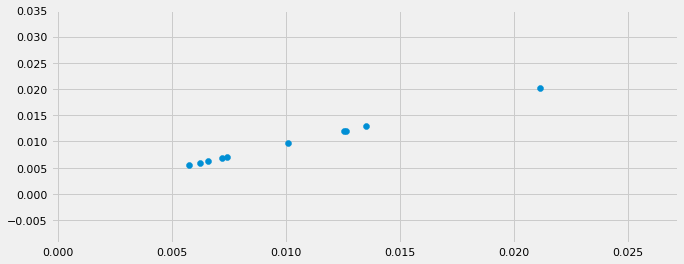

In [76]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
#from sklearn.datasets.samples_generator import (make_blobs, make_circles, make_moons)

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


#Plot the data
plt.figure(figsize=(10, 4))
plt.scatter(yy, xx)

There is that midly interesting tidbit I told Mike about but otherwise this was... meh <br>
And while word2vec seems promising, I'm going to shoot for n-grams first

## Try this with n-grams (perhaps 2 or 3 words)


In [ ]:
# Ask Frank about directionality in n-grams

In [ ]:
tfid_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfid_ngram = tfid_vectorizer.fit_transform(data['description'])
feature_names= np.array(tfid_vectorizer.get_feature_names())
nmf_model = NMF(random_state=23) # Think about using n_components; random_state to seed it consistent for repeatibiltiy


In [ ]:
#W = nmf_model.fit_transform(tfid_ngram)

In [ ]:
#H = nmf_model.components_